In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os   

In [10]:
# 1. Angle - Count rate dependency

In [48]:
def plott_settings_default(plot_title, xlabel, ylabel, name_for_saving=0, legend_title=0, subtitle=0):
    plt.title(plot_title)
    plt.xlabel(xlabel, fontsize="12")
    plt.ylabel(ylabel, fontsize="12")
    if subtitle != 0: 
        plt.suptitle(subtitle)
    if legend_title!=0: 
        plt.legend(title=legend_title)
    if name_for_saving !=0: 
        plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')
    plt.show()
    

In [49]:
# Efficiency calculation
# Constants
hbar = 1.054571817e-34  # Reduced Planck constant
c= 2.998e8  # Speed of light in vacuum (m/s)

# Wavelength in meters
lambda_IR = 780e-9

omega_IR = 2*np.pi*c/lambda_IR

photons_per_second = lambda beam_pow, OD_value : beam_pow/(hbar * 2*np.pi* c/lambda_IR) *10**(-OD_value)


print(photons_per_second(10e-9,0))
# Input Beam Power
beam_pow = 511e-6
OD_value = 9.57395

channel = 1

39265121442.36665


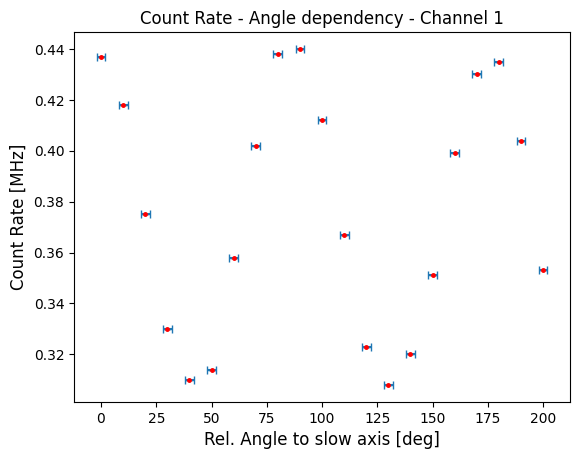

In [50]:
angle_arr = [x for x in range(0,210,10)]
Count_measurements = [0.437,0.418,0.375,0.33,0.31,0.314,0.358,0.402,0.438,0.44,0.412,0.367,0.323,0.308,0.32,0.351,0.399,0.43,0.435,0.404,0.353]

plt.scatter(angle_arr, Count_measurements, marker=".", s=25, color="r", zorder=5)
plt.errorbar(angle_arr, Count_measurements, xerr=[2], yerr=[0.000005], fmt=".", markersize=1, capsize=3)

information = f" P_i: {round(beam_pow*10**-OD_value,14)} W | # Input Rate {round(photons_per_second(beam_pow,OD_value)*10**(-6),4)} MHz"

legendtitle = ""
title = f'Count Rate - Angle dependency - Channel {channel}'
ylabel = 'Count Rate [MHz]'
xlabel = f'Rel. Angle to slow axis [deg]'
save_name = "HQO_2024011_countrate_angle_thesis"

plott_settings_default(title,xlabel, ylabel, name_for_saving=save_name)


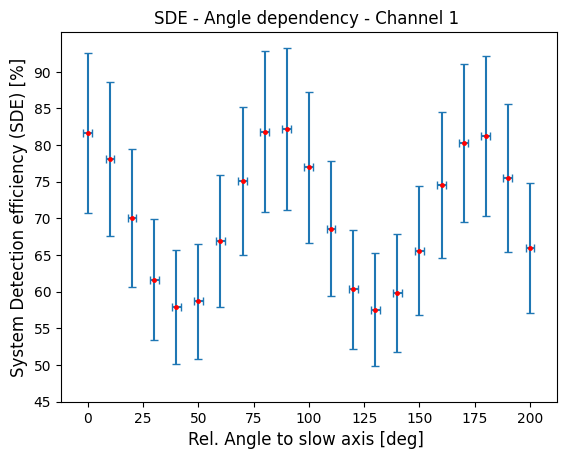

In [14]:
angle_arr = [x for x in range(0,210,10)]
sde_angle = np.array(Count_measurements)/round(photons_per_second(beam_pow,OD_value)*10**(-6),4) * 100

sde_errors = [10.872, 10.476, 9.398, 8.271, 7.769, 7.870, 8.972, 10.075, 10.977, 11.028, 10.326, 9.198, 8.095, 7.719, 8.020, 8.797, 10.000, 10.777, 10.902, 10.125, 8.847]

plt.scatter(angle_arr, sde_angle, marker=".", s=25, color="r", zorder=5)
plt.errorbar(angle_arr, sde_angle, xerr=[2], yerr=sde_errors, fmt=".", markersize=1, capsize=3)

# - P_i: {round(beam_pow*10**-OD_value,14)} W | # Input Rate {round(photons_per_second(beam_pow,OD_value)*10**(-6),4)} MHz
title = f'SDE - Angle dependency - Channel {channel} '
ylabel = f'System Detection efficiency (SDE) [%]'
xlabel = f'Rel. Angle to slow axis [deg] '
plt.yticks(np.arange(45, 95, 5))
save_name = "HQO_2024011_sde_angle_thesis"

plott_settings_default(title,xlabel, ylabel,  name_for_saving=save_name)


In [34]:
# 2. Bias current - trigger voltage dependency
bias_tv_sde_all = os.listdir("/Users/maxim.re/sciebo/Ba_thesis_measurement_data")

# print(np.sort(bias_tv_sde_all))
homedir = "/Users/maxim.re/sciebo/Ba_thesis_measurement_data"

x_data = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-22-36_Bias_sweep_OD_9_15_tv_300mV.txt', skiprows=16, usecols=[0,9])

bias_sweep_9_15_300 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-22-36_Bias_sweep_OD_9_15_tv_300mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_9_15_500 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-18-54_Bias_sweep_OD_9_15_tv_500mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_9_15_750 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-13-14_Bias_sweep_OD_9_15_tv_750mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_9_15_1000 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-26-46_Bias_sweep_OD_9_15_tv_1000mV.txt', skiprows=16, usecols=[0,9])


beam_pow = 511e-6
OD_value_1 = 9.15

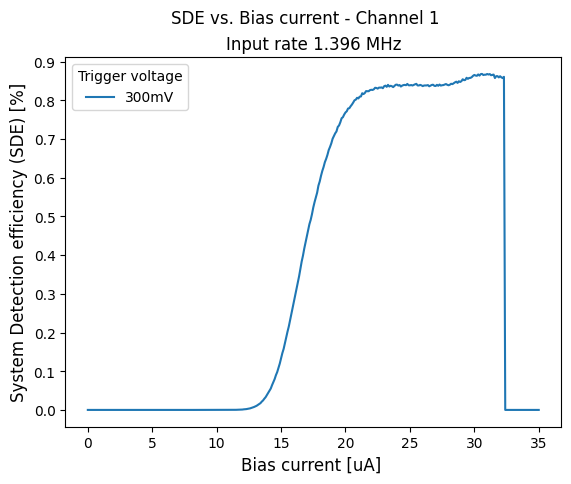

In [16]:
# Plotting
plt.yticks(np.arange(0, 1, 0.1))

plt.plot(bias_sweep_9_15_300[:,0], bias_sweep_9_15_300[:,1]*5/photons_per_second(beam_pow, OD_value_1), label="300mV")
# plt.plot(bias_sweep_9_15_500[:,0], bias_sweep_9_15_500[:,1]*5/photons_per_second(beam_pow, OD_value_1), label="500mV")
# plt.plot(bias_sweep_9_15_750[:,0], bias_sweep_9_15_750[:,1]*5/photons_per_second(beam_pow, OD_value_1), label="750mV")
# plt.plot(bias_sweep_9_15_1000[:,0], bias_sweep_9_15_1000[:,1]*5/photons_per_second(beam_pow, OD_value_1), label="1000mV")

title = f'SDE vs. Bias current - Channel {channel}'
ylabel = f'System Detection efficiency (SDE) [%]'
xlabel = f'Bias current [uA] '
save_name = "HQO_20240711_sde_bias_current_tv_300_1000_thesis"

# plott_settings_default("Input rate 1.396 MHz", xlabel, ylabel, name_for_saving=save_name, legend_title="Trigger voltage", subtitle=title)
plott_settings_default("Input rate 1.396 MHz", xlabel, ylabel, name_for_saving=0, legend_title="Trigger voltage", subtitle=title)


In [17]:
# 3. OD - Efficiency calculation - channel 1 
bias_tv_sde_all = os.listdir("/Users/maxim.re/sciebo/Ba_thesis_measurement_data")

# print(np.sort(bias_tv_sde_all))
homedir = "/Users/maxim.re/sciebo/Ba_thesis_measurement_data"

x_data = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-13-14_Bias_sweep_OD_9_15_tv_750mV.txt', skiprows=16, usecols=[0,9])

bias_sweep_9_58_750 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-35-56_Bias_sweep_OD_9_58_tv_750mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_8_08_750 = np.loadtxt(f'{homedir}/HQO__2024-06-28--15-49-01_Bias_sweep_OD_8_0840_tv_750mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_8_32_750 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-05-58_Bias_sweep_OD_8_32_tv_750mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_7_65_750 = np.loadtxt(f'{homedir}/HQO__2024-06-28--15-39-01_Bias_sweep_OD_7.6598_tv_750mV.txt', skiprows=16, usecols=[0,9])

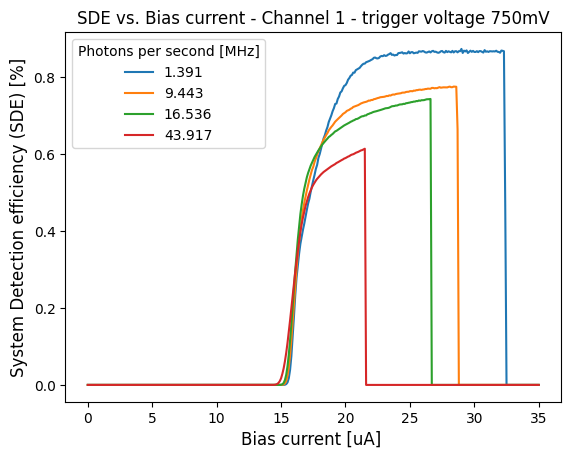

In [83]:
# Plotting

OD_9_58 = 9.5834
OD_9_15 = 9.1591
OD_8_32 = 8.3273
OD_8_08 = 8.0840
OD_7_65 = 7.6598

delta_OD_9_58 = 0.1054
delta_OD_9_15 = 0.1049
delta_OD_8_32 = 0.1035
delta_OD_8_08 = 0.0567
delta_OD_7_65 = 0.1008

def error_function_sde(beam_power, OD_value, OD_error, measured_photonrate):
    measurement_uncertainty = 10**(-OD_value)*0.03*beam_power
    output_error_power = np.sqrt((10**(-OD_value) * measurement_uncertainty)**2 + (10**(-OD_value) * beam_power * np.log10(10) * OD_error)**2)
    output_error_frequency = output_error_power/(hbar * omega_IR)
    return np.sqrt((measured_photonrate/photons_per_second(beam_power, OD_value)**2 * output_error_frequency)**2) 

bias_sweep_test = np.loadtxt(f'Bias Sweep Variable OD/HQO__2024-06-27--09-24-53_Bias_sweep_OD_9.57_tv_300mV.txt', skiprows=16, usecols=[0,9])

plt.plot(bias_sweep_9_15_750[:,0], bias_sweep_9_15_750[:,1]*5/photons_per_second(beam_pow, OD_9_15), label=f"{round(photons_per_second(beam_pow, OD_9_15) *10**(-6),3)}")
plt.plot(bias_sweep_8_32_750[:,0], bias_sweep_8_32_750[:,1]*5/photons_per_second(beam_pow, OD_8_32), label=f"{round(photons_per_second(beam_pow, OD_8_32) *10**(-6),3)}")
plt.plot(bias_sweep_8_08_750[:,0], bias_sweep_8_08_750[:,1]*5/photons_per_second(beam_pow, OD_8_08), label=f"{round(photons_per_second(beam_pow, OD_8_08) *10**(-6),3)}")
plt.plot(bias_sweep_7_65_750[:,0], bias_sweep_7_65_750[:,1]*5/photons_per_second(beam_pow, OD_7_65), label=f"{round(photons_per_second(beam_pow, OD_7_65) *10**(-6),3)}")

title = f'SDE vs. Bias current - Channel {channel} - trigger voltage 750mV'
ylabel = f'System Detection efficiency (SDE) [%]'
xlabel = f'Bias current [uA] '
save_name = "HQO_20240711_sde_bias_current_750_thesis"

plott_settings_default(title, xlabel, ylabel, name_for_saving=0, legend_title="Photons per second [MHz]")

In [84]:
# 4. Photon rate dependent - Efficiency calculation - channel 1 
maxima_arr = np.array([np.max(bias_sweep_9_15_750[:,1]*5/photons_per_second(beam_pow, OD_9_15)),
np.max(bias_sweep_8_32_750[:,1]*5/photons_per_second(beam_pow, OD_8_32)),
np.max(bias_sweep_8_08_750[:,1]*5/photons_per_second(beam_pow, OD_8_08)),
np.max(bias_sweep_7_65_750[:,1]*5/photons_per_second(beam_pow, OD_7_65))])

error_arr_sde = np.array([error_function_sde(beam_pow, OD_9_15,delta_OD_9_15, np.max(bias_sweep_9_15_750[:,1]*5)),error_function_sde(beam_pow, OD_8_32,delta_OD_8_32, np.max(bias_sweep_8_32_750[:,1]*5)),error_function_sde(beam_pow, OD_8_08,delta_OD_8_08, np.max(bias_sweep_8_08_750[:,1]*5)),error_function_sde(beam_pow, OD_7_65,delta_OD_7_65, np.max(bias_sweep_7_65_750[:,1]*5))])

photon_counts = np.array([round(photons_per_second(beam_pow, OD_9_15) *10**(-6),3),round(photons_per_second(beam_pow, OD_8_32) *10**(-6),3),round(photons_per_second(beam_pow, OD_8_08) *10**(-6),3),round(photons_per_second(beam_pow, OD_7_65) *10**(-6),3)])

0.8730862689700405
0.0915867496149572


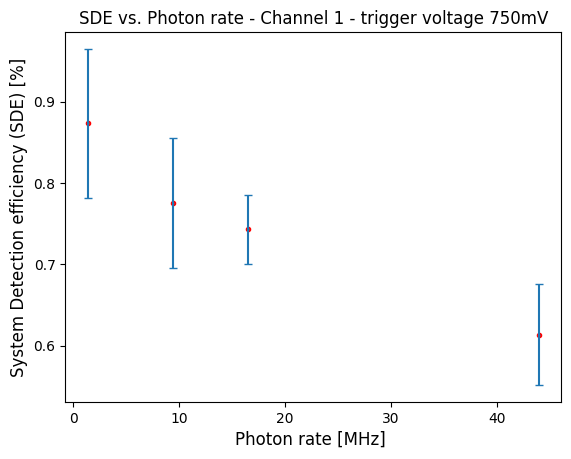

In [88]:
# plotting - photon rate vs. SDE
print(maxima_arr[0])
print(error_arr_sde[0])
plt.scatter(photon_counts, maxima_arr, marker=".", color="r", label="Channel 1")
plt.errorbar(photon_counts, maxima_arr, yerr=error_arr_sde, fmt=".", markersize=1, capsize=3)
title = f'SDE vs. Photon rate - Channel {channel} - trigger voltage 750mV'
ylabel = f'System Detection efficiency (SDE) [%]'
xlabel = f'Photon rate [MHz] '
save_name = "HQO_20240711_sde_photon_rate_750_thesis"

plott_settings_default(title, xlabel, ylabel, name_for_saving=save_name)